Requisiti

In [ ]:
!pip install pandas
!pip install openpyxl xlrd

**Import dei dataset**

In [4]:
import pandas as pd

#Percorsi file
dataset_path = '..//FakeCTI.xlsx'


#lettura in dataframe
df = pd.read_excel(dataset_path)


**Struttura del dataset**

In [20]:
# Stampa le prime 5 righe del dataset
print("Prime 5 righe del dataset:")
print(df.head())

Prime 5 righe del dataset:
                                                 URL  \
0  https://web.archive.org/web/20161011224653/htt...   
1  https://web.archive.org/web/20161015002001/htt...   
2  https://web.archive.org/web/20160928083422/htt...   
3  https://web.archive.org/web/20161110093403/htt...   
4  https://web.archive.org/web/20161220110105/htt...   

                                              TITOLO               SOURCE  \
0  Pope Francis Shocks World, Endorses Donald Tru...  Ending the Fed News   
1  IT’S OVER: Hillary’s ISIS Email Just Leaked & ...  Ending the Fed News   
2  Just Read the Law: Hillary is Disqualified fro...  Ending the Fed News   
3  FBI AGENT SUSPECTED IN HILLARY EMAIL LEAKS FOU...      Denver Guardian   
4  FBI director received millions from Clinton Fo...  Ending the Fed News   

                                               TESTO  \
0  VATICAN CITY – News outlets around the world a...   
1  Today Wikileaks released what is, by far, the ...   
2  We

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12155 entries, 0 to 12154
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   URL           12155 non-null  object
 1   TITOLO        700 non-null    object
 2   SOURCE        12140 non-null  object
 3   TESTO         12153 non-null  object
 4   CAMPAGNA      12140 non-null  object
 5   THREAT ACTOR  92 non-null     object
 6   TIPO          12155 non-null  object
dtypes: object(7)
memory usage: 664.9+ KB
None


**Numero di notizie**

Totale delle notizie: 12155


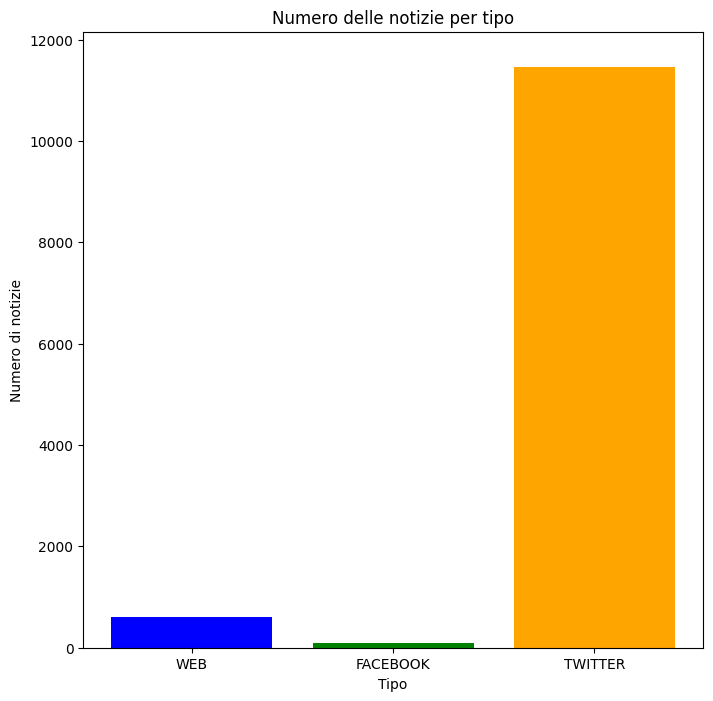

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Stampa il totale delle righe
total_rows = len(df)
print(f"Totale delle notizie: {total_rows}")

# Conta le righe per ciascun valore nella colonna 'tipo'
web_count = len(df[df['TIPO'] == 'WEB'])
facebook_count = len(df[df['TIPO'] == 'FACEBOOK'])
twitter_count = len(df[df['TIPO'] == 'TWITTER'])

# Prepara i dati per il grafico
labels = ['WEB', 'FACEBOOK', 'TWITTER']
counts = [web_count, facebook_count, twitter_count]

# Crea il grafico a barre
plt.figure(figsize=(8, 8))
plt.bar(labels, counts, color=['blue', 'green', 'orange'])

# Aggiunge i titoli e le etichette
plt.xlabel('Tipo')
plt.ylabel('Numero di notizie')
plt.title('Numero delle notizie per tipo')

# Imposta i limiti dell'asse y
plt.ylim(0, total_rows)

# Mostra il grafico
plt.show()

**Numero di notizie per campagne**

In [6]:
# Calcola il numero totale di campagne diverse
numero_totale_campagne = df['CAMPAGNA'].nunique()

# Stampa il risultato
print(f"Numero totale di campagne diverse nel dataset: {numero_totale_campagne}")

# Conta il numero di righe per ciascuna campagna
campagna_counts = df.groupby('CAMPAGNA').size()

# Prepara i dati per il grafico
campagne = campagna_counts.index  # ottiene i nomi delle campagne
conteggi = campagna_counts.values  # ottiene i conteggi delle righe per ogni campagna

# Stampa il risultato
print("Numero di righe per ciascuna campagna:")
print(campagna_counts)

Numero totale di campagne diverse nel dataset: 43
Numero di righe per ciascuna campagna:
CAMPAGNA
 Covid vaccines cause autism                                         5
2016 US presidential elections                                      11
5 meter tall human                                                   1
A Cure for Wellnes Promotion                                         5
Alabama Power Positive Reputation                                    3
American Action News                                               119
Cannabis cure for cancer                                             1
Climate Change Denial                                               30
Clone Zone                                                           3
Coronavirus and vaccines in America                                  8
Counter criticism of Turkey in foreign media                         2
Covid trigger Neurological Degenerative Diseases                     9
Covid vaccines cospiration theories               

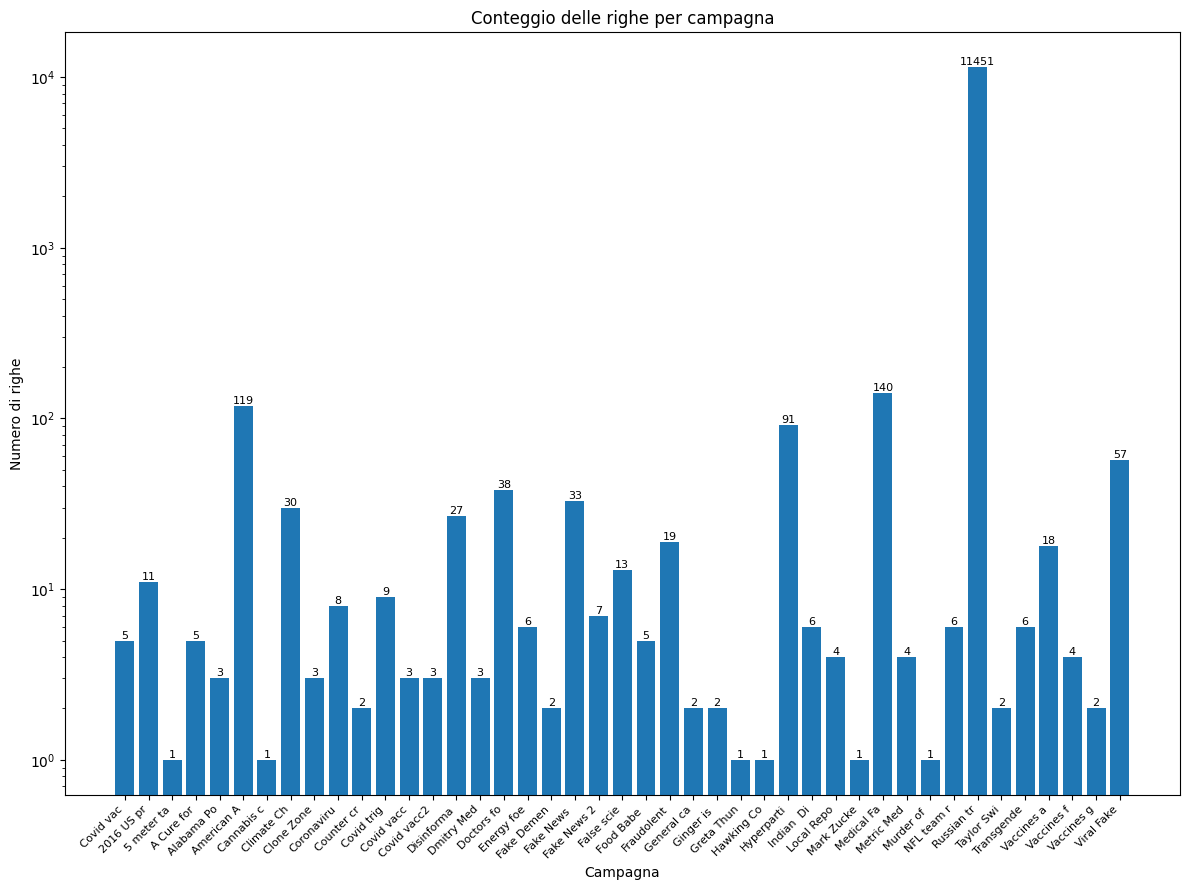

In [19]:
# Funzione per abbreviare i nomi delle campagne mantenendo le prime 10 lettere e aggiungendo un numero progressivo in caso di duplicati
def abbrevia_campagne(campagne):
    abbreviazioni = []
    nomi_visti = {}

    for campagna in campagne:
        # Mantiene solo le prime 10 lettere
        abbreviazione = campagna[:10]
        
        # Se l'abbreviazione esiste già, aggiunge un numero progressivo
        if abbreviazione in nomi_visti:
            nomi_visti[abbreviazione] += 1
            abbreviazione += str(nomi_visti[abbreviazione])
        else:
            nomi_visti[abbreviazione] = 1
        
        abbreviazioni.append(abbreviazione)

    return abbreviazioni

# Abbrevia i nomi delle campagne mantenendo le prime 10 lettere e garantendo unicità
campagne_abbreviate = abbrevia_campagne(campagne)

# Crea il grafico a barre
plt.figure(figsize=(12, 9))
bars = plt.bar(campagne_abbreviate, conteggi)

# Aggiunge i titoli e le etichette
plt.xlabel('Campagna')
plt.ylabel('Numero di righe')
plt.title('Conteggio delle righe per campagna')

# Ruota le etichette sull'asse x per una migliore leggibilità e riduce il font size
plt.xticks(rotation=45, ha='right', fontsize=8)

# Imposta una scala logaritmica per l'asse y
plt.yscale('log')

# Aggiunge il numero di righe sopra ogni barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', fontsize=8)

# Mostra il grafico
plt.tight_layout()
plt.show()


**Numero di notizie per Source**

In [43]:
# Conta il numero di righe per ciascun valore nella colonna 'SOURCE'
source_counts = df.groupby('SOURCE').size()

# Prepara i dati per il grafico
sources = source_counts.index  # ottiene i nomi delle sorgenti
counts = source_counts.values  # ottiene i conteggi delle righe per ogni sorgente

# Stampa il risultato
print("Numero di righe per ciascuna source:")
print(source_counts)

Numero di righe per ciascuna source:
SOURCE
100percentfedup         1
ABC News                3
ABC News Politics       2
Addicting Info         31
Adobo Chronicles        1
                     ... 
trayneshacole         152
washingtontimes         1
westernjournal.com      1
worldofhashtags       426
zerohedge.com           2
Length: 149, dtype: int64


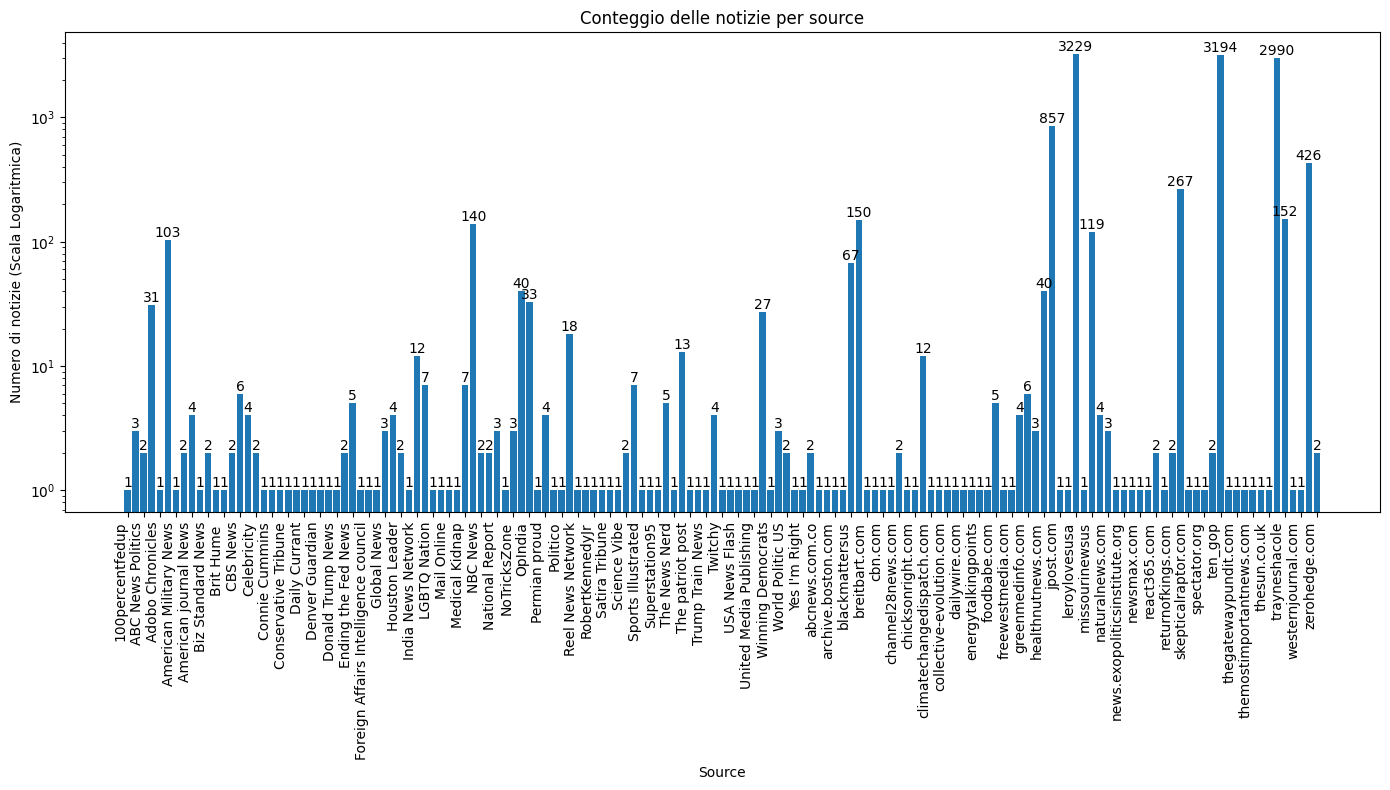

In [54]:
# Crea il grafico a barre
plt.figure(figsize=(14, 8))  # aumenta la dimensione della figura
bars = plt.bar(sources, counts)

# Aggiunge i titoli e le etichette
plt.xlabel('Source')
plt.ylabel('Numero di notizie (Scala Logaritmica)')
plt.title('Conteggio delle notizie per source')

# Imposta una scala logaritmica per l'asse y
plt.yscale('log')

# Ruota le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=90, ha='right')

# Aumenta lo spazio tra le etichette
ax = plt.gca()
ax.set_xticks(ax.get_xticks()[::2])  # mostra un'etichetta ogni 2
# Aggiunge il numero di righe sopra ogni barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')

# Mostra il grafico
plt.tight_layout()
plt.show()

**Numero di notizie per threat actor**

Numero di righe per ciascun threat actor :
THREAT ACTOR
Alabama Power            3
Alex Jones               9
Banc De Binary           1
Chevron                  6
Elizabeth Erin          40
Joseph Mercola           2
Paul Horner             11
Peter McCullough         1
Regency Enterprises      5
Robert F. Kennedy Jr    10
Sherri Tenpenny          4
dtype: int64


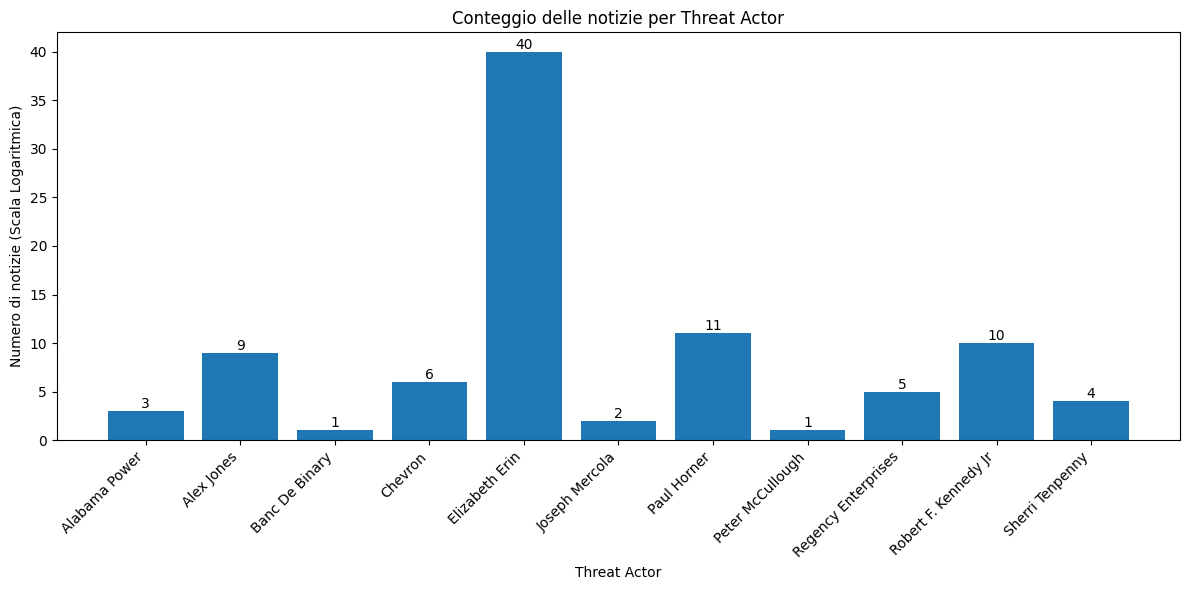

In [59]:
# Conta il numero di righe per ciascun valore nella colonna 'THREAT ACTOR'
threat_actor_counts = df.groupby('THREAT ACTOR').size()

# Prepara i dati per il grafico
threat_actors = threat_actor_counts.index  # ottiene i nomi dei threat actors
counts = threat_actor_counts.values  # ottiene i conteggi delle righe per ogni threat actor
# Stampa il risultato
print("Numero di righe per ciascun threat actor :")
print(threat_actor_counts)

# Crea il grafico a barre
plt.figure(figsize=(12, 6))
bars = plt.bar(threat_actors, counts)

# Aggiunge i titoli e le etichette
plt.xlabel('Threat Actor')
plt.ylabel('Numero di notizie (Scala Logaritmica)')
plt.title('Conteggio delle notizie per Threat Actor')

# Ruota le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45, ha='right')

# Imposta una scala logaritmica per l'asse y
#plt.yscale('log')

# Aggiunge il numero di righe sopra ogni barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')

# Mostra il grafico
plt.tight_layout()
plt.show()


**WORD CLOUDS**

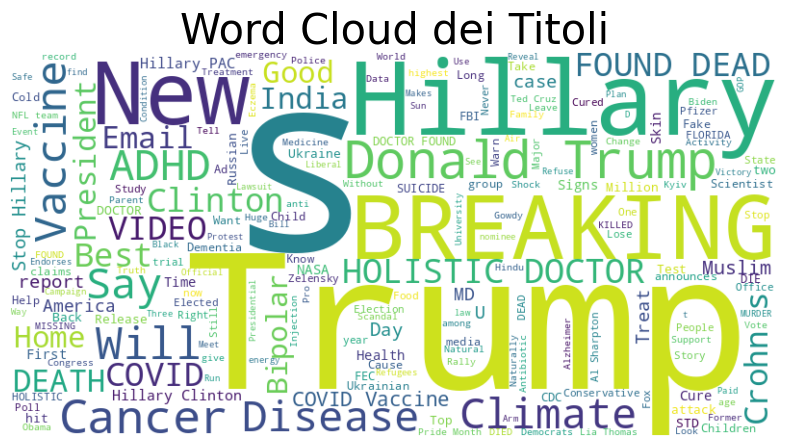

In [68]:
from wordcloud import WordCloud
# Unisce tutti i titoli in una singola stringa
text = " ".join(titolo for titolo in df['TITOLO'].dropna())

# Genera la word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200).generate(text)

# Visualizza la word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Nasconde gli assi
plt.title('Word Cloud dei Titoli', fontsize=30)
plt.show()

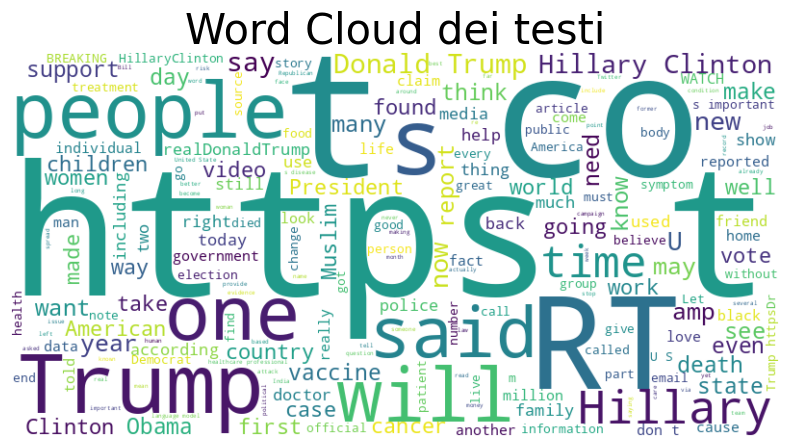

In [66]:
# Unisce tutti i titoli in una singola stringa
text = " ".join(titolo for titolo in df['TESTO'].dropna())

# Genera la word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200).generate(text)

# Visualizza la word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Nasconde gli assi
plt.title('Word Cloud dei testi', fontsize=30)
plt.show()

**N-GRAM ANALYSIS**

In [77]:
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.ticker as ticker
# Funzione per pulire il testo
def preprocess_text(text):
    text = text.lower()  # Converti in minuscolo
    text = re.sub(r'\d+', '', text)  # Rimuovi numeri
    text = re.sub(r'\s+', ' ', text)  # Rimuovi spazi extra
    text = re.sub(r'[^\w\s]', '', text)  # Rimuovi punteggiatura
    return text

# Genera N-grams
def generate_ngrams(text, n):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform([text])
    ngram_counts = ngrams.toarray().sum(axis=0)
    ngram_list = vectorizer.get_feature_names_out()
    return Counter(dict(zip(ngram_list, ngram_counts)))

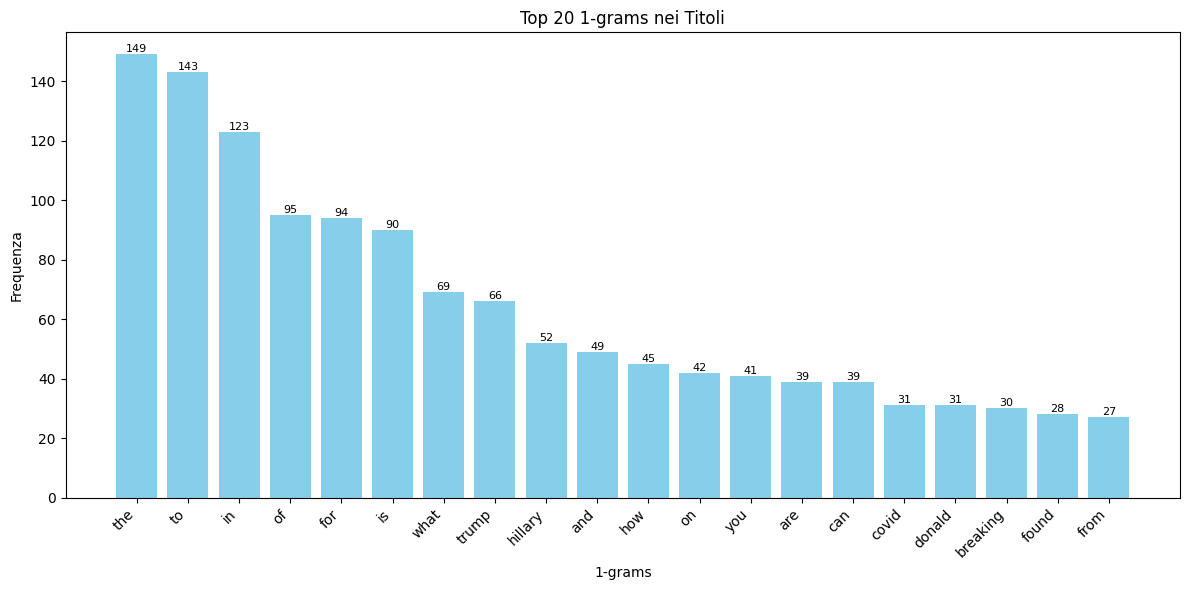

In [80]:
# Unisce tutti i titoli in una singola stringa
text = " ".join(titolo for titolo in df['TITOLO'].dropna())

# Pulisce il testo
cleaned_text = preprocess_text(text)

# Scegli il valore di N (ad esempio 2 per bigrammi, 3 per trigrammi)
n = 1
ngrams = generate_ngrams(cleaned_text, n)

# Ottieni i 20 N-gram più comuni
most_common_ngrams = ngrams.most_common(20)

# Visualizza i N-gram più frequenti
ngrams, counts = zip(*most_common_ngrams)
plt.figure(figsize=(12, 6))
bars = plt.bar(ngrams, counts, color='skyblue')
plt.xlabel(f'{n}-grams')
plt.ylabel('Frequenza')
plt.title(f'Top 20 {n}-grams nei Titoli')
plt.xticks(rotation=45, ha='right')

# Formatta l'asse y per mostrare solo valori interi
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Aggiunge il numero sopra ogni barra
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), counts[i],
             ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

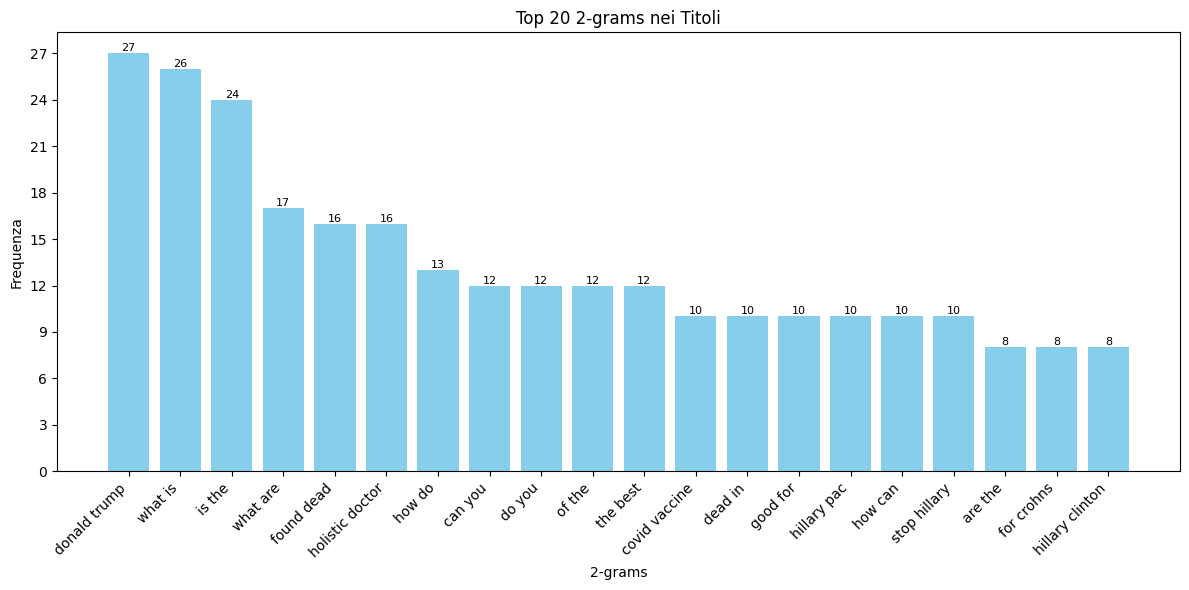

In [81]:
# Scegli il valore di N (ad esempio 2 per bigrammi, 3 per trigrammi)
n = 2
ngrams = generate_ngrams(cleaned_text, n)

# Ottieni i 20 N-gram più comuni
most_common_ngrams = ngrams.most_common(20)

# Visualizza i N-gram più frequenti
ngrams, counts = zip(*most_common_ngrams)
plt.figure(figsize=(12, 6))
bars = plt.bar(ngrams, counts, color='skyblue')
plt.xlabel(f'{n}-grams')
plt.ylabel('Frequenza')
plt.title(f'Top 20 {n}-grams nei Titoli')
plt.xticks(rotation=45, ha='right')

# Formatta l'asse y per mostrare solo valori interi
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Aggiunge il numero sopra ogni barra
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), counts[i],
             ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

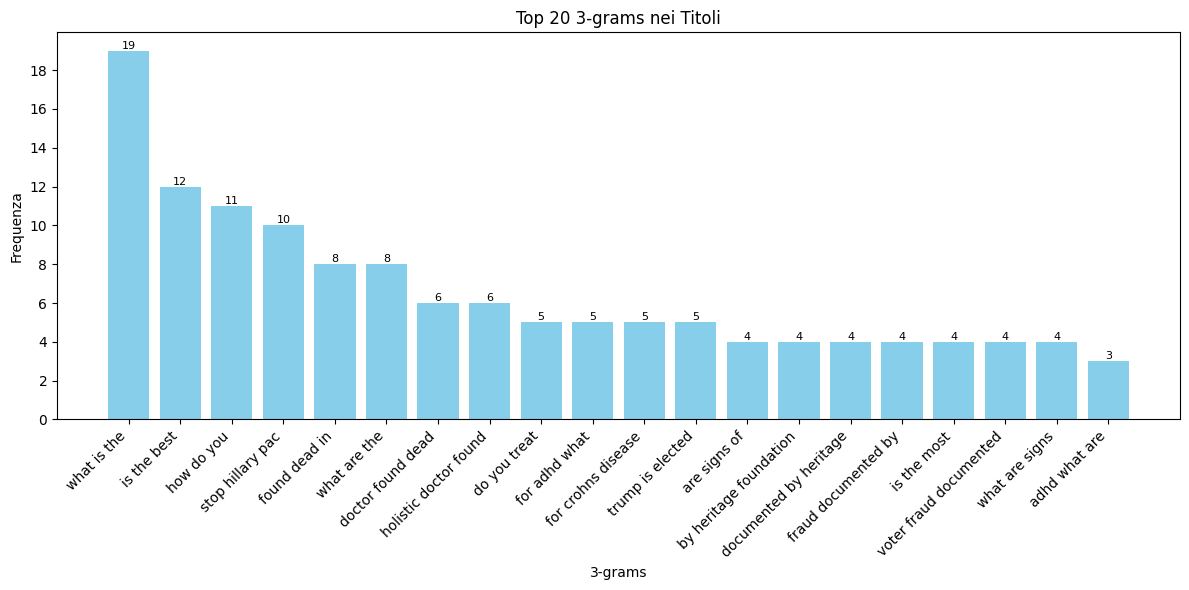

In [82]:
# Scegli il valore di N (ad esempio 2 per bigrammi, 3 per trigrammi)
n = 3
ngrams = generate_ngrams(cleaned_text, n)

# Ottieni i 20 N-gram più comuni
most_common_ngrams = ngrams.most_common(20)

# Visualizza i N-gram più frequenti
ngrams, counts = zip(*most_common_ngrams)
plt.figure(figsize=(12, 6))
bars = plt.bar(ngrams, counts, color='skyblue')
plt.xlabel(f'{n}-grams')
plt.ylabel('Frequenza')
plt.title(f'Top 20 {n}-grams nei Titoli')
plt.xticks(rotation=45, ha='right')

# Formatta l'asse y per mostrare solo valori interi
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Aggiunge il numero sopra ogni barra
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), counts[i],
             ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

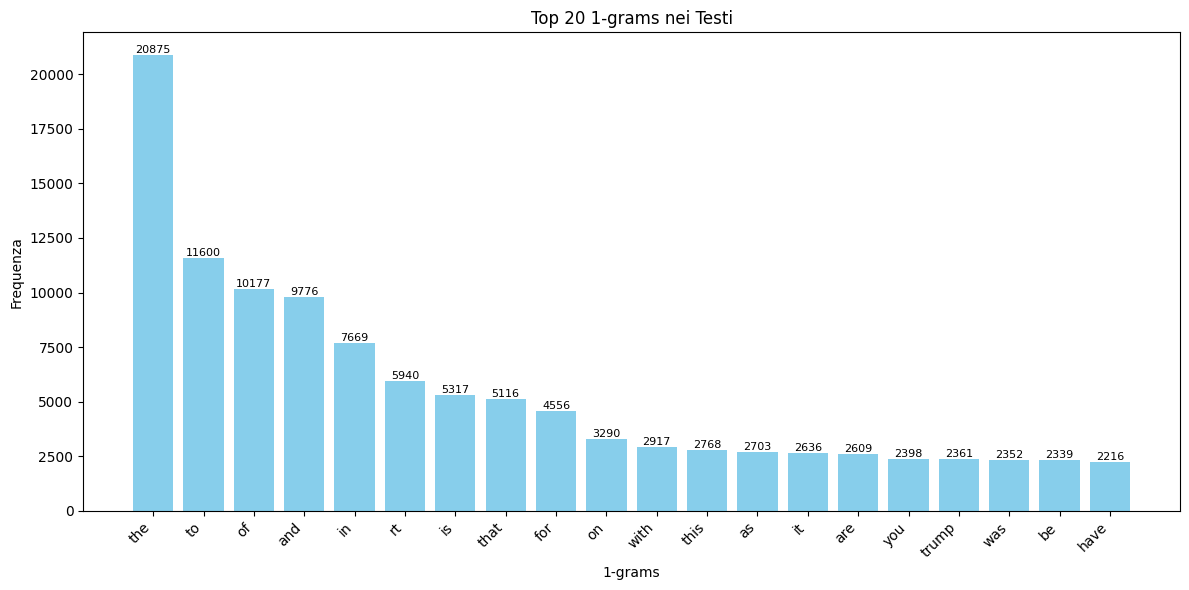

In [83]:
# Unisce tutti i titoli in una singola stringa
text = " ".join(testo for testo in df['TESTO'].dropna())

# Pulisce il testo
cleaned_text = preprocess_text(text)

# Scegli il valore di N (ad esempio 2 per bigrammi, 3 per trigrammi)
n = 1
ngrams = generate_ngrams(cleaned_text, n)

# Ottieni i 20 N-gram più comuni
most_common_ngrams = ngrams.most_common(20)

# Visualizza i N-gram più frequenti
ngrams, counts = zip(*most_common_ngrams)
plt.figure(figsize=(12, 6))
bars = plt.bar(ngrams, counts, color='skyblue')
plt.xlabel(f'{n}-grams')
plt.ylabel('Frequenza')
plt.title(f'Top 20 {n}-grams nei Testi')
plt.xticks(rotation=45, ha='right')

# Formatta l'asse y per mostrare solo valori interi
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Aggiunge il numero sopra ogni barra
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), counts[i],
             ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

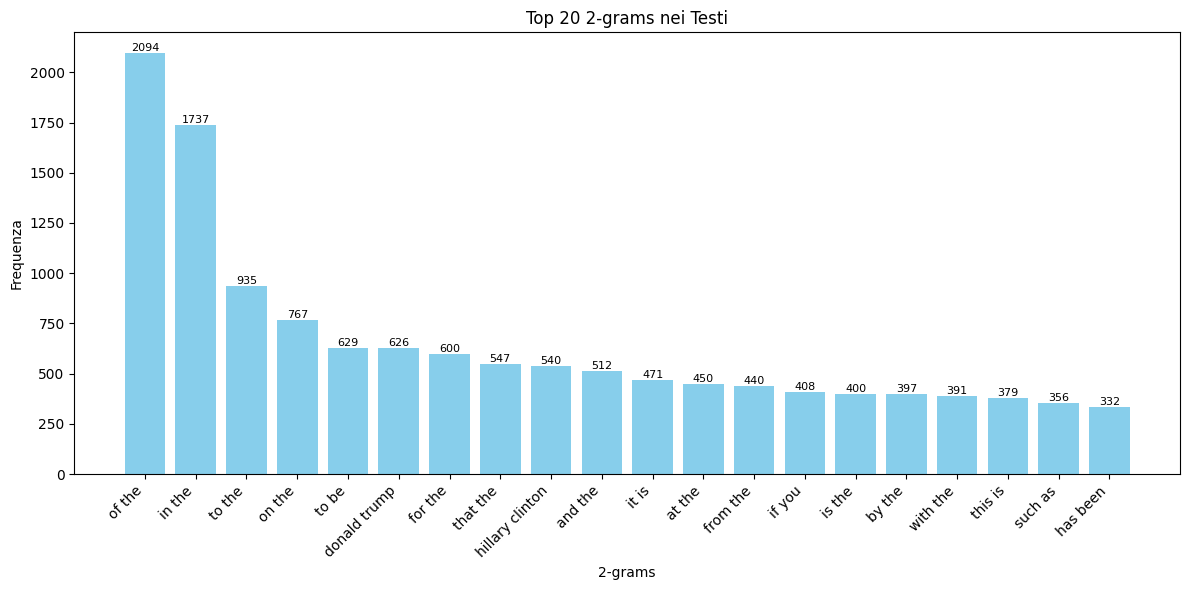

In [84]:

# Scegli il valore di N (ad esempio 2 per bigrammi, 3 per trigrammi)
n = 2
ngrams = generate_ngrams(cleaned_text, n)

# Ottieni i 20 N-gram più comuni
most_common_ngrams = ngrams.most_common(20)

# Visualizza i N-gram più frequenti
ngrams, counts = zip(*most_common_ngrams)
plt.figure(figsize=(12, 6))
bars = plt.bar(ngrams, counts, color='skyblue')
plt.xlabel(f'{n}-grams')
plt.ylabel('Frequenza')
plt.title(f'Top 20 {n}-grams nei Testi')
plt.xticks(rotation=45, ha='right')

# Formatta l'asse y per mostrare solo valori interi
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Aggiunge il numero sopra ogni barra
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), counts[i],
             ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

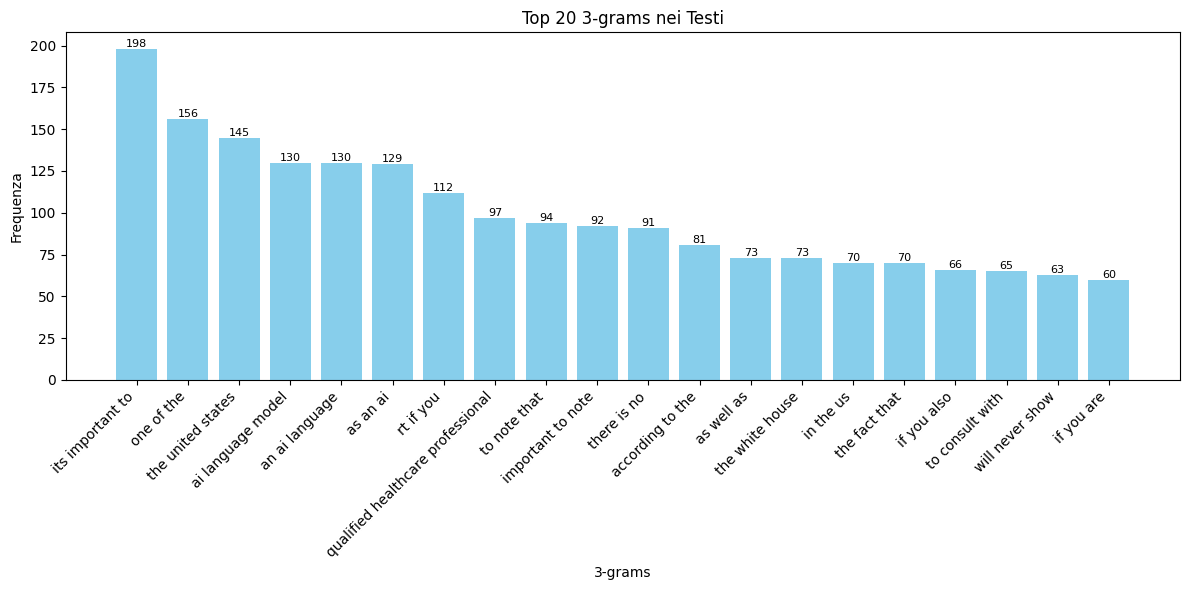

In [85]:

# Scegli il valore di N (ad esempio 2 per bigrammi, 3 per trigrammi)
n = 3
ngrams = generate_ngrams(cleaned_text, n)

# Ottieni i 20 N-gram più comuni
most_common_ngrams = ngrams.most_common(20)

# Visualizza i N-gram più frequenti
ngrams, counts = zip(*most_common_ngrams)
plt.figure(figsize=(12, 6))
bars = plt.bar(ngrams, counts, color='skyblue')
plt.xlabel(f'{n}-grams')
plt.ylabel('Frequenza')
plt.title(f'Top 20 {n}-grams nei Testi')
plt.xticks(rotation=45, ha='right')

# Formatta l'asse y per mostrare solo valori interi
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Aggiunge il numero sopra ogni barra
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), counts[i],
             ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

**Import dataframes campagne**


In [87]:
AmericanActionNews_path= '/content/American Action News RAW.xlsx'
ViralFakeNews_path= '/content/Viral Fake News RAW.xlsx'
RussianTrolls_path= '/content/Russian Trolls RAW.xlsx'
Facebook_path= '/content/facebook-fact-check RAW.csv'
OpInda_path='/content/OpIndia.xlsx'
RealFarmacy_path='/content/RealFarmacy.xlsx'
MedicalOutline_path='/content/MedicalOutline.xlsx'

#lettura dataframes
AAN_df= pd.read_excel(AmericanActionNews_path)
ViralFakeNews_df = pd.read_excel(ViralFakeNews_path)
Russian_df = pd.read_excel(RussianTrolls_path)
Facebook_df = pd.read_csv(Facebook_path)
OpInda_df= pd.read_excel(OpInda_path)
RealFarmacy_df= pd.read_excel(RealFarmacy_path)
MedicalOutline_df= pd.read_excel(MedicalOutline_path)

**Percentuale di raggiungibilità per American Action News**

In [89]:
numero_righe_AAN = AAN_df.shape[0] +1
#Il +1 è perché c'è un articolo in più non presente nel dataset di partenza

print(f"Il numero totale di righe di American Action News è: {numero_righe_AAN}")

# Ottieni il numero di righe del DataFrame filtrato
Nrighe_filtrate_AAN = df['CAMPAGNA'].value_counts().loc["American Action News"]

print(f"Il numero di righe presenti nel dataset per la Campagna AAN è: {Nrighe_filtrate_AAN}")

# Calcola la percentuale delle righe filtrate rispetto al totale delle righe
percentuale_ragg_AAN = (Nrighe_filtrate_AAN / numero_righe_AAN) * 100

print(f"La percentuale di notizie raggiunte per American Action News è: {percentuale_ragg_AAN}")

Il numero totale di righe di American Action News è: 173
Il numero di righe presenti nel dataset per la Campagna AAN è: 104
La percentuale di notizie raggiunte per American Action News è: 60.115606936416185


**Percentuale di raggiungibilità per Viral Fake Election News**

In [94]:
numero_righe_Viral = ViralFakeNews_df.shape[0]

print(f"Il numero totale di righe di Viral Fake News è: {numero_righe_Viral}")

# Ottieni il numero di righe del DataFrame filtrato
Nrighe_filtrate_VFE = df['CAMPAGNA'].value_counts().loc["Viral Fake Election News"]

print(f"Il numero di righe presenti nel dataset per la Campagna ViralFakeNews è: {Nrighe_filtrate_VFE}")

# Calcola la percentuale delle righe filtrate rispetto al totale delle righe
percentuale_ragg_ViralFake = (Nrighe_filtrate_VFE / numero_righe_Viral) * 100

print(f"La percentuale di notizie raggiunte per Viral Fake News News è: {percentuale_ragg_ViralFake}")

Il numero totale di righe di Viral Fake News è: 60
Il numero di righe presenti nel dataset per la Campagna ViralFakeNews è: 57
La percentuale di notizie raggiunte per Viral Fake News News è: 95.0


**Percentuale di raggiungibilità per Hyperpartisan in 2016 American politic Elections**

In [95]:
# Filtra le righe che hanno "Rating" uguale a "mostly false" o "mixture of true and false"
filtered_df = Facebook_df[Facebook_df['Rating'].isin(['mostly false', 'mixture of true and false'])]

# Conta il numero di righe che soddisfano il filtro
numero_righe_Facebook = filtered_df.shape[0]

print(f"Il numero totale di righe di Facebook è: {numero_righe_Facebook}")

# Ottieni il numero di righe del DataFrame filtrato
Nrighe_filtrate_H2016 = df['CAMPAGNA'].value_counts().loc["Hyperpartisan in 2016 American Politic Elections"]

print(f"Il numero di righe presenti nel dataset per la Hyperpartisan in 2016 American Politic Elections è: {Nrighe_filtrate_H2016}")

# Calcola la percentuale delle righe filtrate rispetto al totale delle righe
percentuale_ragg_Facebook = (Nrighe_filtrate_H2016 / numero_righe_Facebook) * 100

print(f"La percentuale di notizie raggiunte per Viral Fake News News è: {percentuale_ragg_Facebook}")

Il numero totale di righe di Facebook è: 349
Il numero di righe presenti nel dataset per la Hyperpartisan in 2016 American Politic Elections è: 91
La percentuale di notizie raggiunte per Viral Fake News News è: 26.07449856733524


**Percentuale di raggiungibilità per Russian Troll account**

In [96]:
numero_righe_Russian = Russian_df.shape[0]

print(f"Il numero totale di righe di Russian Trolls è: {numero_righe_Russian}")

Nrighe_filtrate_Russian = df['CAMPAGNA'].value_counts().loc["Russian troll accounts during 2016 U.S. presidential election"]

print(f"Il numero di righe presenti nel dataset per la Campagna Russian Troll Accounts 2016 è: {Nrighe_filtrate_Russian}")

# Calcola la percentuale delle righe filtrate rispetto al totale delle righe
percentuale_ragg_Russian = (Nrighe_filtrate_Russian / numero_righe_Russian) * 100

print(f"La percentuale di notizie raggiunte per Viral Fake News News è: {percentuale_ragg_Russian}")

Il numero totale di righe di Russian Trolls è: 11451
Il numero di righe presenti nel dataset per la Campagna Russian Troll Accounts 2016 è: 11451
La percentuale di notizie raggiunte per Viral Fake News News è: 100.0


**Percentuale di raggiungibilità per OpIndia**

In [97]:
numero_righe_OpIndia = OpInda_df.shape[0]

print(f"Il numero totale di righe di OpIndia è: {numero_righe_OpIndia}")

Nrighe_filtrate_OpIndia = df['CAMPAGNA'].value_counts().loc["Fake News on OpIndia between January 2018 and June 2020"]

print(f"Il numero di righe presenti nel dataset per la Campagna OpIndia è: {Nrighe_filtrate_OpIndia}")

# Calcola la percentuale delle righe filtrate rispetto al totale delle righe
percentuale_ragg_OpIndia = (Nrighe_filtrate_OpIndia / numero_righe_OpIndia) * 100

print(f"La percentuale di notizie raggiunte per OpIndia è: {percentuale_ragg_OpIndia}")

Il numero totale di righe di OpIndia è: 40
Il numero di righe presenti nel dataset per la Campagna OpIndia è: 33
La percentuale di notizie raggiunte per OpIndia è: 82.5


**Percentuale di raggiungibilità per Medical Outline**

In [99]:
numero_righe_Medical = MedicalOutline_df.shape[0]+1

print(f"Il numero totale di righe di Medical Outline è: {numero_righe_Medical}")

Nrighe_filtrate_Medical = df['CAMPAGNA'].value_counts().loc["Medical Fake News"]

print(f"Il numero di righe presenti nel dataset per la Campagna Medical Outline è: {Nrighe_filtrate_Medical}")

# Calcola la percentuale delle righe filtrate rispetto al totale delle righe
percentuale_ragg_Med = (Nrighe_filtrate_Medical / numero_righe_Medical) * 100

print(f"La percentuale di notizie raggiunte per OpIndia è: {percentuale_ragg_Med}")

Il numero totale di righe di Medical Outline è: 140
Il numero di righe presenti nel dataset per la Campagna Medical Outline è: 140
La percentuale di notizie raggiunte per OpIndia è: 100.0


**Percentuale di raggiungibilità per Real Farmacy**

In [100]:
numero_righe_Farm = RealFarmacy_df.shape[0]

print(f"Il numero totale di righe di Real Farmacy è: {numero_righe_Farm}")

Nrighe_filtrate_Farm = df['CAMPAGNA'].value_counts().loc["Vaccines and illnesses fake news"]

print(f"Il numero di righe presenti nel dataset per la Campagna Medical Outline è: {Nrighe_filtrate_Farm}")

# Calcola la percentuale delle righe filtrate rispetto al totale delle righe
percentuale_ragg_Farm = (Nrighe_filtrate_Farm / numero_righe_Farm) * 100

print(f"La percentuale di notizie raggiunte per OpIndia è: {percentuale_ragg_Farm}")

Il numero totale di righe di Real Farmacy è: 32
Il numero di righe presenti nel dataset per la Campagna Medical Outline è: 18
La percentuale di notizie raggiunte per OpIndia è: 56.25


**Grafico raggiungibilità campagne**

*NB: Le percentuali sono state calcolate per le uniche campagne di cui si possedevano i dati esatti sul numero di fake news*

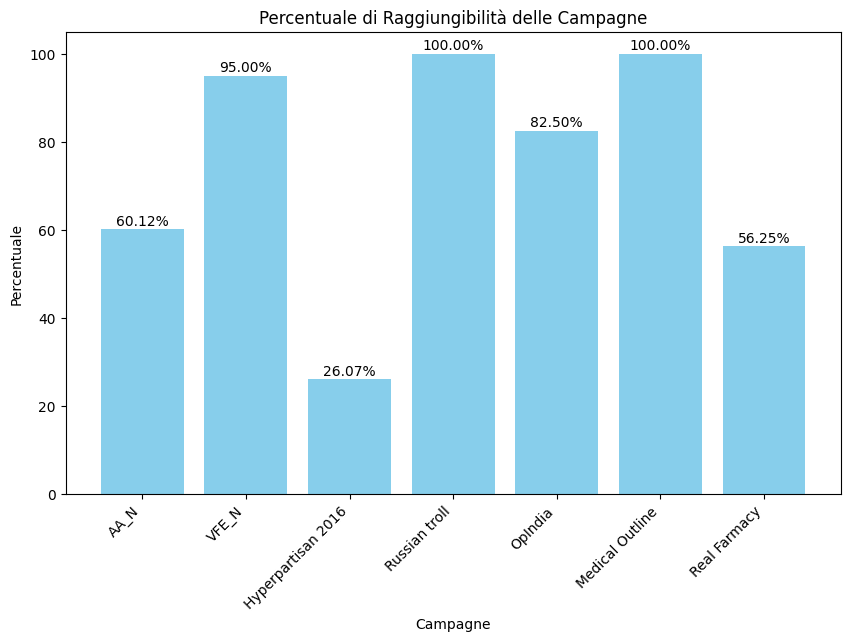

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Supponiamo di avere queste variabili percentuali
dati = {
    'Variabile': ['AA_N', 'VFE_N', 'Hyperpartisan 2016', 'Russian troll', 'OpIndia', 'Medical Outline', 'Real Farmacy'],
    'Percentuale': [percentuale_ragg_AAN, percentuale_ragg_ViralFake, percentuale_ragg_Facebook, percentuale_ragg_Russian, percentuale_ragg_OpIndia,percentuale_ragg_Med, percentuale_ragg_Farm]
}

# Creiamo un DataFrame
df_Plot = pd.DataFrame(dati)

# Creiamo un grafico a barre
plt.figure(figsize=(10, 6))
bars = plt.bar(df_Plot['Variabile'], df_Plot['Percentuale'], color='skyblue')

# Aggiungiamo titoli e etichette
plt.title('Percentuale di Raggiungibilità delle Campagne')
plt.xlabel('Campagne')
plt.ylabel('Percentuale')

# Aggiungiamo le percentuali sopra le barre
for index, value in enumerate(df_Plot['Percentuale']):
    label = f'{value:.2f}%'  # Formattiamo il valore a due cifre decimali
    plt.text(index, value + 1, label, ha='center')


# Ruotiamo le etichette delle x
plt.xticks(rotation=45, ha='right')

# Mostriamo il grafico
plt.show()
